# AL 7-5~7-6

### 1) 문제 정의


7-5 : 분할정복기법을 이용한 0-1 배낭 채우기

7-6 : 동적 계획법을 이용한 0-1 배낭 채우기

### 2) 알고리즘 설명

7-5 : 문제를 작은 부분 문제로 분할하여 각각을 해결하고, 그 해를 결합하여 원래 문제를 해결하는 알고리즘인 분할 정복 기법을 사용하였습니다.

7-6 : 큰 문제를 작은 부분 문제로 나누어 해결하고, 작은 부분 문제의 해결 결과를 저장하여 중복 계산을 피하는 알고리즘인 동적 계획법을 사용하였습니다. 

### 3) 손으로 푼 예제
7-5 
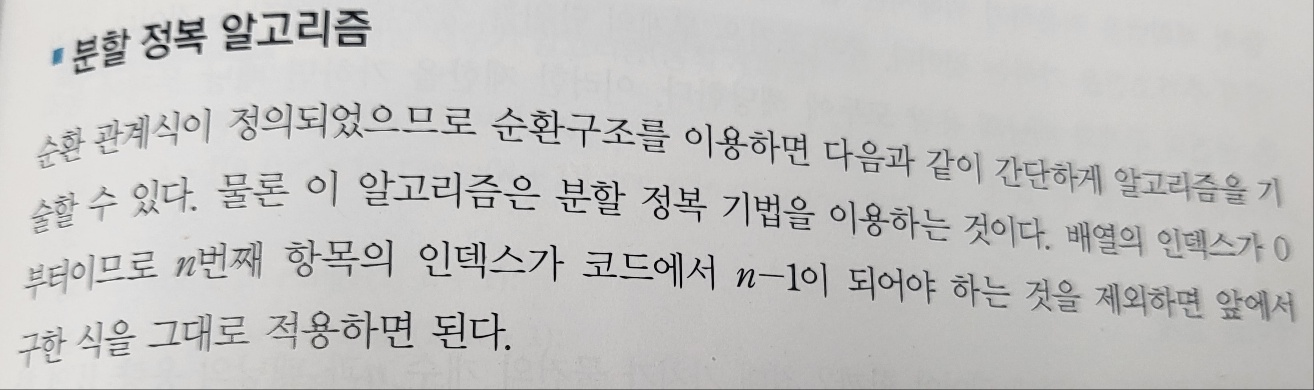
7-6
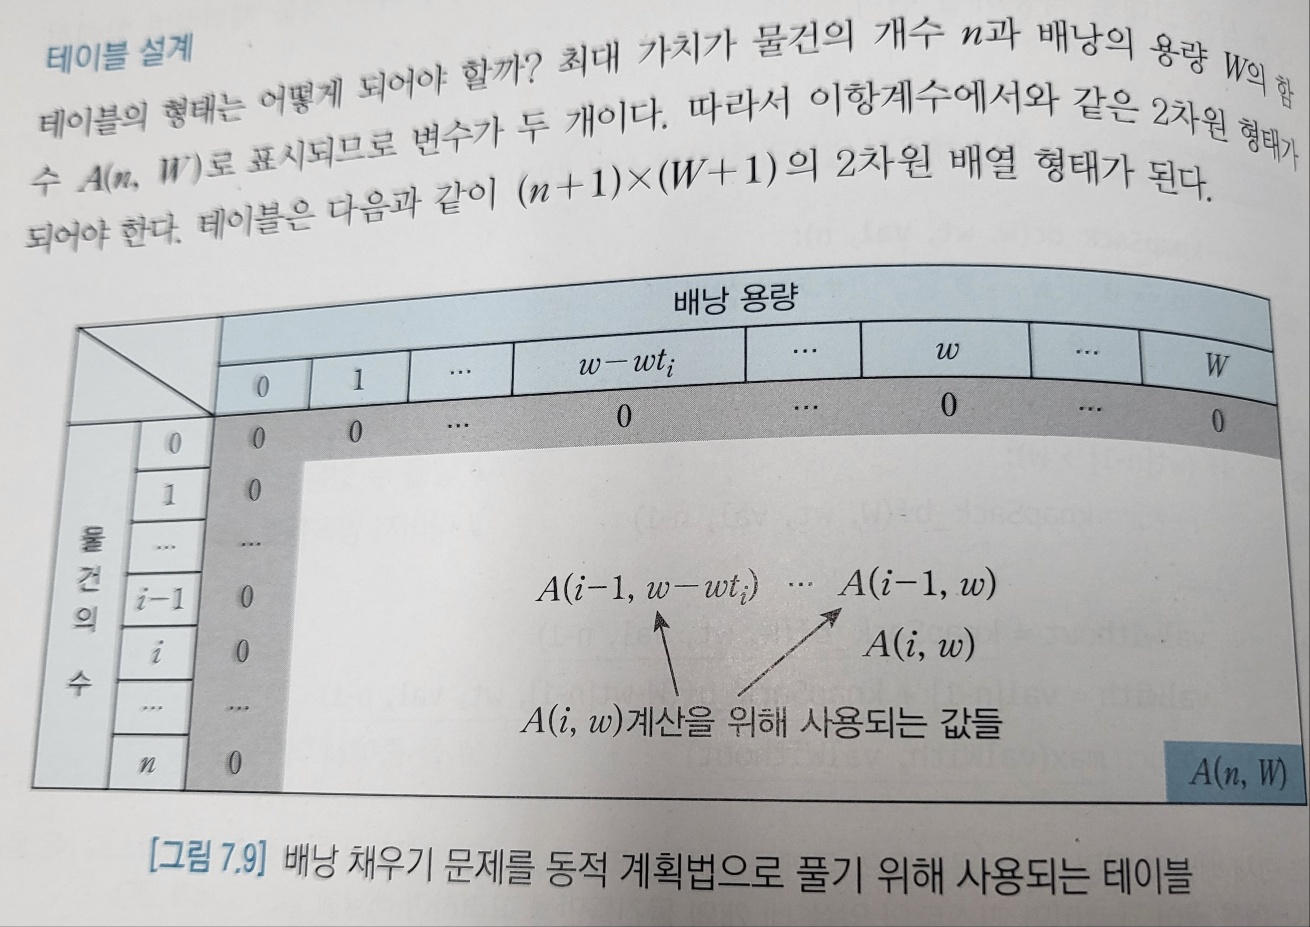

### 4) 코드 개요

7-5     
2행 : 기반 상황    
5행 : 넣을 수 없음  
6행 : 나머지 항목들로 처리      
10행 : 둘 중에서 더 큰 값  

7-6  
2행 : 테이블을 만들고  
3행 : 기반 상황 처리   
4행 : 기반 상황 처리  
5행 : 상향식으로 : 2,3,...n    
6행 : 부분 문제들을 해결하고 저장함    
7행 : 결과 반환    

### 5) 알고리즘 코드

In [4]:
## 7-5
def knapSack_dc(W, wt, val, n):
    if n == 0 or W == 0:        #기반 상황
        return 0
    
    if wt[n-1] > W:             #넣을 수 없음
        return knapSack_dc(W, wt, val, n-1)     #나머지 항목들로 처리
    else:
        valWithout = knapSack_dc(W, wt, val, n-1)
        valWith = val[n-1] + knapSack_dc(W - wt[n-1], wt, val, n-1)
        return max(valWith, valWithout)         #둘 중에서 더 큰 값

## 7-6
def knapSack_dp(W, wt, val, n):
    A = [[0 for x in range(W + 1)] for x in range(n + 1)]
    
    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if wt[i-1] > w:             #i번째 물건이 배낭 용량 초과
                A[i][w] = A[i-1][w]     
            else:                       #i번째 물건이 배낭 용량 이하
                valWith = val[i-1] + A[i-1][w - wt[i-1]]    #넣는 경우
                valWithout = A[i-1][w]                      #빼는 경우
                A[i][w] = max(valWith, valWithout)          #더 큰 값 선택
                
    return A[n][W]                                  #최종 결과가 저장됨

### 6) 수행결과

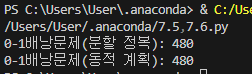

### 7) 테스트 코드

In [5]:
val = [60, 100, 190, 120, 200, 150]
wt = [2, 5, 8, 4, 7, 6]
W = 18
n = len(val)
print("0-1배낭문제(분할 정복):", knapSack_dc(W, wt, val, n))
print("0-1배낭문제(동적 계획):", knapSack_dp(W, wt, val, n))

0-1배낭문제(분할 정복): 480
0-1배낭문제(동적 계획): 480


### 8) 복잡도 분석

시간 복잡도 : O(n)  